In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', RuntimeWarning)

# set pandas to display not using scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# read first 10000 rows of the csv file
df = pd.read_csv('../Data/SBAnational.csv', low_memory=False, nrows=10000)
# df = pd.read_csv('../Data/SBAnational.csv', low_memory=False)

# drop rows where BalenceGross is not 0
# this means that the loan is not yet paid off and has yet to default
df = df[df['BalanceGross'].str.strip() == '$0.00']

# drop columns that are not needed
df = df.drop(['Bank', 'LoanNr_ChkDgt', 'Name', 'ApprovalDate', 'DisbursementDate', 'ChgOffDate', 'BalanceGross'], axis=1)

# convert Yes/No and PIF/CHGOFF to 1/0 floats
# floats is temporary, will be converted to ints later after imputing missing values
df['RevLineCr'] = df['RevLineCr'].map({'Y': 1, 'N': 0})
df['LowDoc'] = df['LowDoc'].map({'Y': 1, 'N': 0})
df['MIS_Status'] = df['MIS_Status'].map({'P I F': 1, 'CHGOFF': 0})

# convert dollar amounts to integers
# all dollar amounts are even dollar amounts
df['DisbursementGross'] = df['DisbursementGross'].str.replace('$', '').str.replace(',', '').str.replace('\.00', '').astype(float)
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].str.replace('$', '').str.replace(',', '').str.replace('\.00', '').astype(float)
df['GrAppv'] = df['GrAppv'].str.replace('$', '').str.replace(',', '').str.replace('\.00', '').astype(float)
df['SBA_Appv'] = df['SBA_Appv'].str.replace('$', '').str.replace(',', '').str.replace('\.00', '').astype(float)

df.head()

,City,State,Zip,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,EVANSVILLE,IN,47711,OH,451120,1997,84,4,2,0,0,1,0,0.00000,1.00000,60000.00000,1.00000,0.00000,60000.00000,48000.00000
1,NEW PARIS,IN,46526,IN,722410,1997,60,2,2,0,0,1,0,0.00000,1.00000,40000.00000,1.00000,0.00000,40000.00000,32000.00000
2,BLOOMINGTON,IN,47401,IN,621210,1997,180,7,1,0,0,1,0,0.00000,0.00000,287000.00000,1.00000,0.00000,287000.00000,215250.00000
3,BROKEN ARROW,OK,74012,OK,0,1997,60,2,1,0,0,1,0,0.00000,1.00000,35000.00000,1.00000,0.00000,35000.00000,28000.00000
4,ORLANDO,FL,32801,FL,0,1997,240,14,1,7,7,1,0,0.00000,0.00000,229000.00000,1.00000,0.00000,229000.00000,229000.00000


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               10000 non-null  object 
 1   State              10000 non-null  object 
 2   Zip                10000 non-null  int64  
 3   BankState          9994 non-null   object 
 4   NAICS              10000 non-null  int64  
 5   ApprovalFY         10000 non-null  int64  
 6   Term               10000 non-null  int64  
 7   NoEmp              10000 non-null  int64  
 8   NewExist           10000 non-null  int64  
 9   CreateJob          10000 non-null  int64  
 10  RetainedJob        10000 non-null  int64  
 11  FranchiseCode      10000 non-null  int64  
 12  UrbanRural         10000 non-null  int64  
 13  RevLineCr          7890 non-null   float64
 14  LowDoc             9999 non-null   float64
 15  DisbursementGross  10000 non-null  float64
 16  MIS_Status         9979

In [3]:
df.describe()

,Zip,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,7890.00000,9999.00000,10000.00000,9979.00000,10000.00000,10000.00000,10000.00000
mean,51338.61700,411505.38500,2001.63310,89.63470,9.91530,1.31070,0.59350,0.88190,2131.16610,0.79470,0.44943,0.09531,130490.70880,0.81351,10450.47500,122116.42200,87046.60220
std,31042.16798,250319.54457,4.26728,64.35729,130.36344,0.47073,3.66076,5.66194,11392.03276,0.68176,0.49747,0.29366,221009.01381,0.38952,47351.15487,215991.71463,171614.78742
min,0.00000,0.00000,1972.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2500.00000,1250.00000
25%,27602.25000,238210.00000,1997.00000,60.00000,2.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,25000.00000,1.00000,0.00000,25000.00000,12500.00000
50%,48417.00000,448310.00000,2004.00000,84.00000,3.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,53289.50000,1.00000,0.00000,50000.00000,25000.00000
75%,83642.00000,561710.00000,2004.00000,84.00000,8.00000,2.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,126000.00000,1.00000,0.00000,101700.00000,75000.00000
max,99999.00000,928120.00000,2006.00000,358.00000,9992.00000,2.00000,150.00000,180.00000,91283.00000,2.00000,1.00000,1.00000,3599911.00000,1.00000,1311939.00000,3275000.00000,3275000.00000


<Figure size 432x288 with 0 Axes>

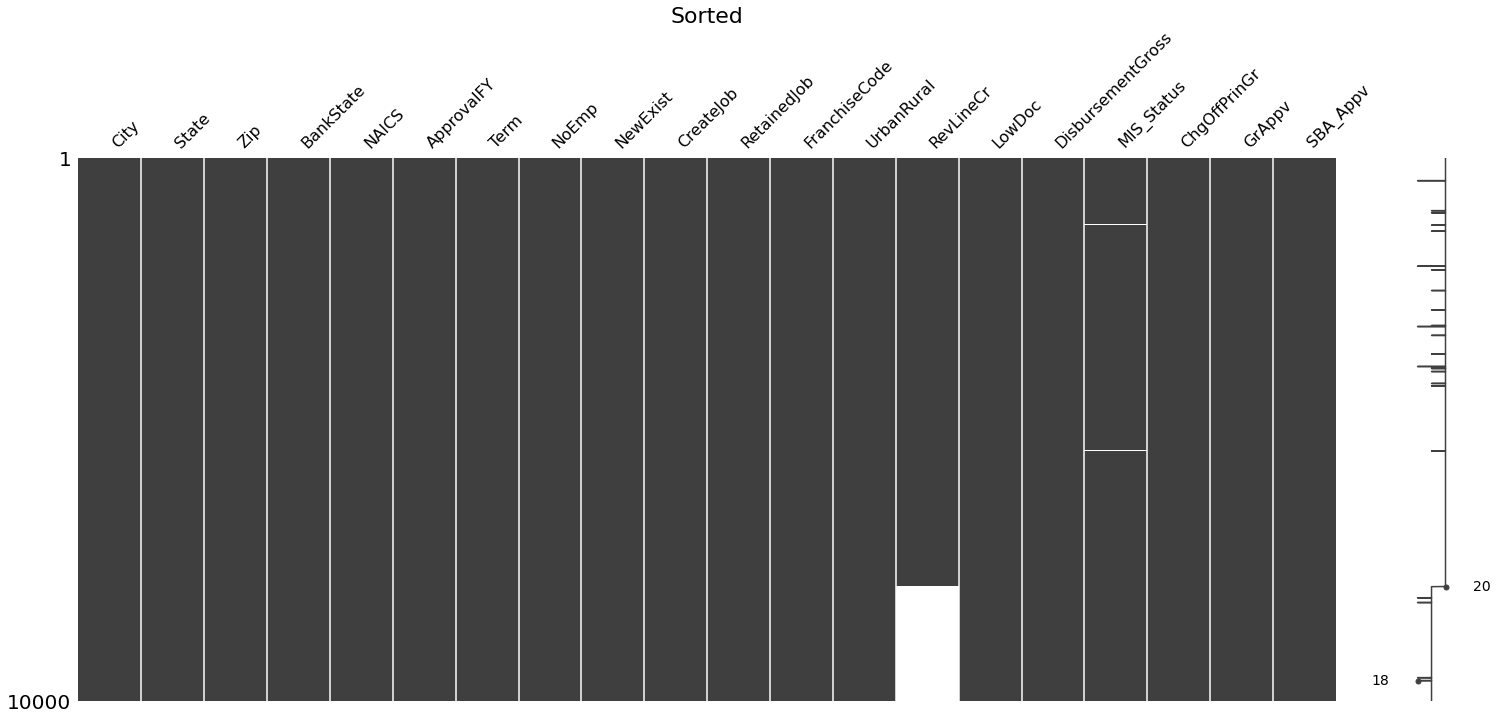

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

plt.figure()
mn.matrix(df.sort_values(by=["RevLineCr"]))
plt.title("Sorted",fontsize=22)
plt.show()

In [5]:
from operator import concat


df_droped = df.dropna()

vars_to_use = ['Zip', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
corr1 = df_droped[vars_to_use].corr()['RevLineCr'].abs()
corr2 = df_droped[vars_to_use].corr()['MIS_Status'].abs()
corr1 = corr1.sort_values(ascending=False)
corr2 = corr2.sort_values(ascending=False)

print(corr1.loc[corr1 > 0.25])
print(corr2.loc[corr2 > 0.25])

RevLineCr    1.00000
UrbanRural   0.34361
LowDoc       0.33505
SBA_Appv     0.29190
GrAppv       0.27061
NAICS        0.26834
Term         0.25934
Name: RevLineCr, dtype: float64
MIS_Status     1.00000
ChgOffPrinGr   0.47074
Term           0.32194
Name: MIS_Status, dtype: float64


In [6]:
# impute based upon the K closest samples (rows)
# our first introduction to sklearn!!!
from sklearn.impute import KNNImputer
import copy

# get object for imputation
knn_obj = KNNImputer(n_neighbors=5)

features_to_use = ['RevLineCr', 'UrbanRural', 'LowDoc', 'SBA_Appv', 'GrAppv', 'NAICS', 'Term']

# create a numpy matrix from pandas numeric values to impute
temp = df[features_to_use].to_numpy()

# use sklearn imputation object
temp_imputed = knn_obj.fit_transform(temp)

# this is VERY IMPORTANT, make a deep copy, not just a reference to the object
# otherwise both data frames will be manipulated
df_imputed = copy.deepcopy(df) # not just an alias
df_imputed[features_to_use] = temp_imputed
df_imputed.dropna(inplace=True)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               9977 non-null   object 
 1   State              9977 non-null   object 
 2   Zip                9977 non-null   int64  
 3   BankState          9977 non-null   object 
 4   NAICS              9977 non-null   float64
 5   ApprovalFY         9977 non-null   int64  
 6   Term               9977 non-null   float64
 7   NoEmp              9977 non-null   int64  
 8   NewExist           9977 non-null   int64  
 9   CreateJob          9977 non-null   int64  
 10  RetainedJob        9977 non-null   int64  
 11  FranchiseCode      9977 non-null   int64  
 12  UrbanRural         9977 non-null   float64
 13  RevLineCr          9977 non-null   float64
 14  LowDoc             9977 non-null   float64
 15  DisbursementGross  9977 non-null   float64
 16  MIS_Status         9977 

In [7]:
df_grouped = df.groupby(by=['UrbanRural', 'LowDoc', 'Term']) # perform the grouping of thing related to 'age'
func = lambda grp: grp.fillna(grp.median()) # within groups, fill using median (define function to do this)
df_imputed_sac = df_grouped.transform(func) # apply impute and transform the data back

# Extra step: fill any deleted columns from the operation
col_deleted = list( set(df.columns) - set(df_imputed_sac.columns)) # in case the median operation deleted columns
df_imputed_sac[col_deleted] = df[col_deleted]

# drop any rows that still had missing values after grouped imputation
df_imputed_sac.dropna(inplace=True)

# 5. Rearrange the columns
df_imputed_sac = df_imputed_sac[['Zip', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']]
df_imputed_sac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9879 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zip                9879 non-null   float64
 1   NAICS              9879 non-null   float64
 2   Term               9879 non-null   int64  
 3   NoEmp              9879 non-null   float64
 4   NewExist           9879 non-null   float64
 5   CreateJob          9879 non-null   float64
 6   RetainedJob        9879 non-null   float64
 7   FranchiseCode      9879 non-null   float64
 8   UrbanRural         9879 non-null   int64  
 9   RevLineCr          9879 non-null   float64
 10  LowDoc             9879 non-null   float64
 11  DisbursementGross  9879 non-null   float64
 12  MIS_Status         9879 non-null   float64
 13  ChgOffPrinGr       9879 non-null   float64
 14  GrAppv             9879 non-null   float64
 15  SBA_Appv           9879 non-null   float64
dtypes: float64(14), int64(2)

0.8162983425414365
0.7220131865097172


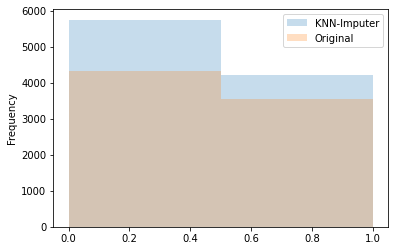

In [8]:
# let's show some very basic plotting to be sure the data looks about the same
# Which imputation did better? The PSlit-Apply-Combine, or  nearest Neighbor Imputer? 

print(df.RevLineCr.sum() / (df.RevLineCr.count() - df.RevLineCr.sum()))
print(df_imputed.RevLineCr.sum() / (df_imputed.RevLineCr.count() - df_imputed.RevLineCr.sum()))

df_grouped = df.groupby(by='RevLineCr')

bin_num = 2

df_imputed.RevLineCr.plot(kind='hist', alpha=0.25, 
                        label="KNN-Imputer",
                        bins=bin_num)

df.RevLineCr.plot(kind='hist', alpha=0.25, 
                        label="Original",
                        bins=bin_num)
plt.legend()
plt.show()